# Homophily

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import random

In [2]:
def create_graph():
    G=nx.Graph()
    for i in range(1,11):
        G.add_node(i)
    return G

In [3]:
def visualize1(G):
    nx.circular_layout(G)
    nx.draw(G,with_labels=True)
    plt.show()

In [4]:
def visualize2(G,labeldict):
    nx.circular_layout(G)
    nx.draw(G,labels=labeldict)
    plt.show()

In [5]:
def visualize3(G,labeldict,nodesize):
    nx.circular_layout(G)
    nx.draw(G,labels=labeldict,node_size=nodesize)
    plt.show()

In [6]:
def visualize4(G,labeldict,nodesize,color):
    nx.circular_layout(G)
    nx.draw(G,labels=labeldict,node_size=nodesize,node_color=color)
    plt.show()

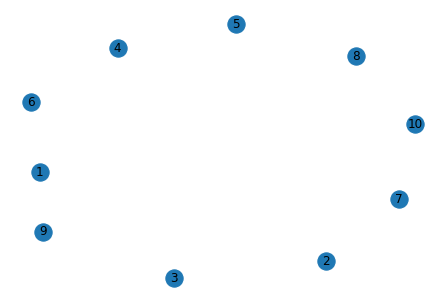

In [7]:
G=create_graph()
visualize1(G)

In [8]:
def assign_gpa(G):
    for each in G.nodes():
        G.node[each]['name']=random.randint(0,10)
        G.node[each]['type']='person'

In [9]:
def get_labels(G):
    dict1={}
    for each in G.nodes():
        dict1[each]=G.node[each]['name']
    return dict1

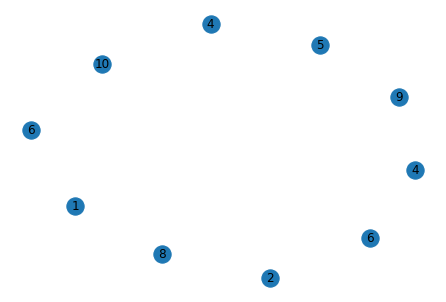

In [10]:
G=create_graph()
assign_gpa(G)
labeldict=get_labels(G)
visualize2(G,labeldict)

In [11]:
def get_size(G):
    array1=[]
    for each in G.nodes():
        array1.append(G.node[each]['name'])
    return array1

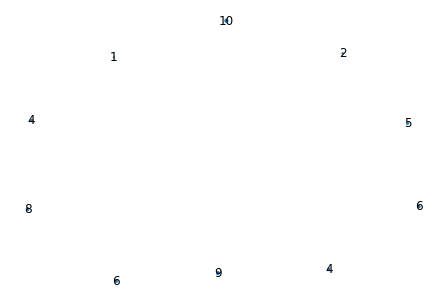

In [12]:
nodesize=get_size(G)
visualize3(G,labeldict,nodesize)

In [13]:
def get_size(G):
    array1=[]
    for each in G.nodes():
        array1.append(G.node[each]['name']*100)
    return array1

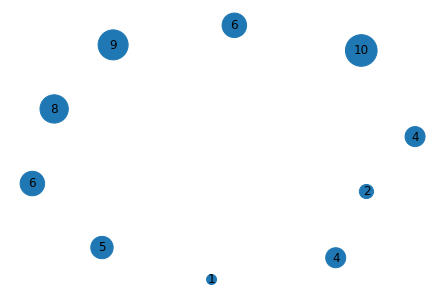

In [14]:
nodesize=get_size(G)
visualize3(G,labeldict,nodesize)

In [15]:
def add_foci_nodes(G):
    n=G.number_of_nodes()
    i=n+1
    foci_nodes=['gym','eatout','movie_club','karate_club','yoga_club']
    for j in range(0,5):
        G.add_node(i)
        G.node[i]['name']=foci_nodes[j]
        G.node[i]['type']='foci'
        i=i+1 

In [16]:
def get_size(G):
    array2=[]
    for each in G.nodes():
        if G.node[each]['type']=='person':
            array2.append(G.node[each]['name']*20)
        else:
            array2.append(1000)
    return array2

In [17]:
def get_colors(G):
    c=[]
    for each in G.nodes():
        if G.node[each]['type']=='person':
            if G.node[each]['name']==7:
                c.append('green')
            elif G.node[each]['name']==6:
                c.append('yellow')
            else:
                c.append('red')
        else:
            if G.node[each]['type']=='foci':
                if G.node[each]['name']=='gym':
                    c.append('blue')
                elif G.node[each]['name']=='eatout':
                    c.append('grey')
                elif G.node[each]['name']=='movie_club':
                    c.append('orange')
                elif G.node[each]['name']=='karate_club':
                    c.append('purple')
                elif G.node[each]['name']=='yoga_club':
                    c.append('pink')
                
    return c

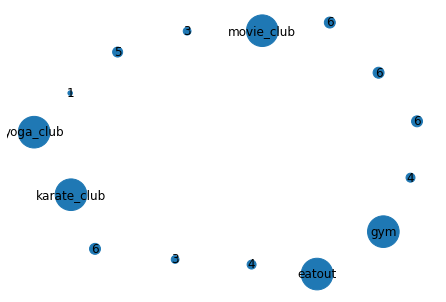

In [18]:
G=create_graph()
assign_gpa(G)
add_foci_nodes(G)
labeldict=get_labels(G)
nodesize=get_size(G)
visualize3(G,labeldict,nodesize)

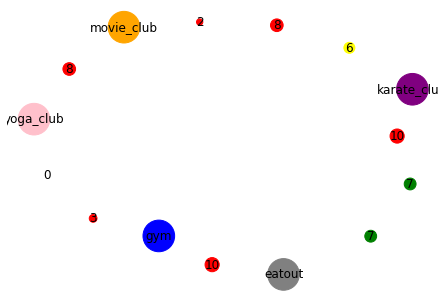

In [19]:
G=create_graph()
assign_gpa(G)
add_foci_nodes(G)
labeldict=get_labels(G)
nodesize=get_size(G)
color_array=get_colors(G)
visualize4(G,labeldict,nodesize,color_array)

In [20]:
def get_foci_nodes():
    f=[]
    for each in G.nodes():
        if G.node[each]['type']=='foci':
            f.append(each)
    return f

In [21]:
def get_persons_nodes():
    p=[]
    for each in G.nodes():
        if G.node[each]['type']=='person':
            p.append(each)
    return p

In [22]:
def add_foci_edges():
    foci_nodes = get_foci_nodes()
    people_nodes = get_persons_nodes()
    for each in people_nodes:
        r=random.choice(foci_nodes)
        G.add_edge(each,r)

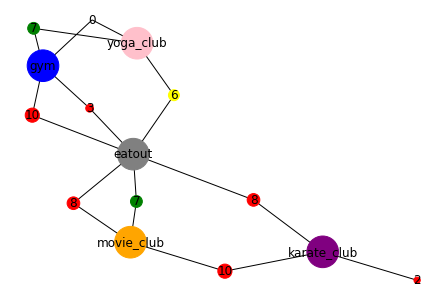

In [24]:
add_foci_edges()
visualize4(G,labeldict,nodesize,color_array)

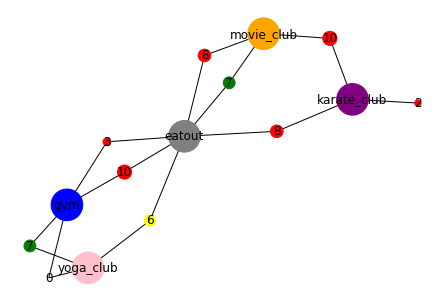

19


In [25]:
color_array = get_colors(G)
visualize4(G,labeldict,nodesize,color_array)
print(G.number_of_edges())

In [26]:
def homophily(G):
    pnodes=get_persons_nodes()
    cnt=0
    for u in pnodes:
        for v in pnodes:
            if u != v:
                diff=abs(G.node[u]['name']-G.node[v]['name'])
                prob=float(1)/(diff+1000)
                #print("diff ",diff,"prob ",prob)
                if prob>0.0008:
                    G.add_edge(u,v)
                    cnt=cnt+1
                    print("Additional edge details\ndiff = ",diff,"\nprob = ",prob,"\nu = ",u,"\nv = ",v)
    print("cnt ",cnt)

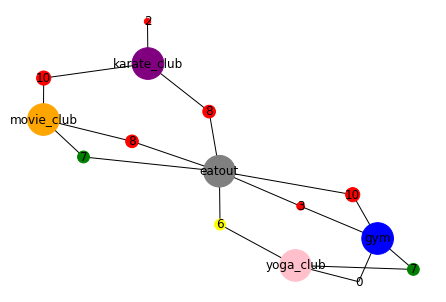

In [27]:
visualize4(G,labeldict,nodesize,color_array)

In [28]:
homophily(G)
print(G.number_of_edges())

Additional edge details
diff =  6 
prob =  0.0009940357852882703 
u =  1 
v =  2
Additional edge details
diff =  10 
prob =  0.0009900990099009901 
u =  1 
v =  3
Additional edge details
diff =  10 
prob =  0.0009900990099009901 
u =  1 
v =  4
Additional edge details
diff =  7 
prob =  0.0009930486593843098 
u =  1 
v =  5
Additional edge details
diff =  8 
prob =  0.000992063492063492 
u =  1 
v =  6
Additional edge details
diff =  3 
prob =  0.0009970089730807576 
u =  1 
v =  7
Additional edge details
diff =  2 
prob =  0.000998003992015968 
u =  1 
v =  8
Additional edge details
diff =  7 
prob =  0.0009930486593843098 
u =  1 
v =  9
Additional edge details
diff =  8 
prob =  0.000992063492063492 
u =  1 
v =  10
Additional edge details
diff =  6 
prob =  0.0009940357852882703 
u =  2 
v =  1
Additional edge details
diff =  4 
prob =  0.00099601593625498 
u =  2 
v =  3
Additional edge details
diff =  4 
prob =  0.00099601593625498 
u =  2 
v =  4
Additional edge details
diff =  

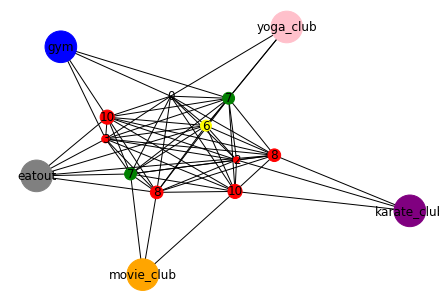

In [29]:
visualize4(G,labeldict,nodesize,color_array)